In [1]:
#### Airbnb Cleaned Europe Dataset

**About Dataset** <br> 
This is a merged dataset of 9 famous cities in Europe.

Amsterdam, Athens, Barcelona, Berlin, Budapest, Lisbon, Paris, Rome and Vienna. <br> 

The original Dataset was really messy and lacked describing appropriate information. <br> 
 
Perform analysis and tell a story you'd like to tell with this dataset. <br> 

Column names are self-explanatory. <br> 

Have fun exploring. <br> 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [4]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [5]:
###! pip install kaggle

In [6]:
####!mkdir ~/.kaggle

In [7]:
###!cp /kaggle.json ~/.kaggle/

In [8]:
###!chmod 600 ~/.kaggle/kaggle.json

In [9]:
###!pip install keras-tuner

In [10]:
###!kaggle datasets download -d dipeshkhemani/airbnb-cleaned-europe-dataset

In [11]:
####! unzip /content/airbnb-cleaned-europe-dataset.zip

In [12]:
#pip --inspect

In [13]:
# Importing all datasets
airbnb = pd.read_csv('/content/Aemf1.csv')
airbnb.head(4)

,City,Price,Day,Room Type,Shared Room,Private Room,Person Capacity,Superhost,Multiple Rooms,Business,Cleanliness Rating,Guest Satisfaction,Bedrooms,City Center (km),Metro Distance (km),Attraction Index,Normalised Attraction Index,Restraunt Index,Normalised Restraunt Index
0,Amsterdam,194.033698,Weekday,Private room,False,True,2.0,False,1,0,10.0,93.0,1,5.022964,2.539380,78.690379,4.166708,98.253896,6.846473
1,Amsterdam,344.245776,Weekday,Private room,False,True,4.0,False,0,0,8.0,85.0,1,0.488389,0.239404,631.176378,33.421209,837.280757,58.342928
2,Amsterdam,264.101422,Weekday,Private room,False,True,2.0,False,0,1,9.0,87.0,1,5.748312,3.651621,75.275877,3.985908,95.386955,6.646700
3,Amsterdam,433.529398,Weekday,Private room,False,True,4.0,False,0,1,9.0,90.0,2,0.384862,0.439876,493.272534,26.119108,875.033098,60.973565


In [14]:
airbnb.columns

Index(['City', 'Price', 'Day', 'Room Type', 'Shared Room', 'Private Room',
       'Person Capacity', 'Superhost', 'Multiple Rooms', 'Business',
       'Cleanliness Rating', 'Guest Satisfaction', 'Bedrooms',
       'City Center (km)', 'Metro Distance (km)', 'Attraction Index',
       'Normalised Attraction Index', 'Restraunt Index',
       'Normalised Restraunt Index'],
      dtype='object')

In [15]:
airbnb.isnull().sum()

City                           0
Price                          0
Day                            0
Room Type                      0
Shared Room                    0
Private Room                   0
Person Capacity                0
Superhost                      0
Multiple Rooms                 0
Business                       0
Cleanliness Rating             0
Guest Satisfaction             0
Bedrooms                       0
City Center (km)               0
Metro Distance (km)            0
Attraction Index               0
Normalised Attraction Index    0
Restraunt Index                0
Normalised Restraunt Index     0
dtype: int64

In [16]:
###! pip install klib

In [17]:
import klib

In [18]:
airbnb = klib.data_cleaning(airbnb)

Long column names detected (>25 characters). Consider renaming the following columns ['normalised_attraction_index', 'normalised_restraunt_index'].
Shape of cleaned data: (41714, 19) - Remaining NAs: 0


Dropped rows: 0
     of which 0 duplicates. (Rows (first 150 shown): [])

Dropped columns: 0
     of which 0 single valued.     Columns: []
Dropped missing values: 0
Reduced memory by at least: 2.98 MB (-57.2%)



In [19]:
airbnb = klib.convert_datatypes(airbnb)

In [20]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   city                         41714 non-null  category
 1   price                        41714 non-null  float64 
 2   day                          41714 non-null  category
 3   room_type                    41714 non-null  category
 4   shared_room                  41714 non-null  boolean 
 5   private_room                 41714 non-null  boolean 
 6   person_capacity              41714 non-null  float32 
 7   superhost                    41714 non-null  boolean 
 8   multiple_rooms               41714 non-null  int8    
 9   business                     41714 non-null  int8    
 10  cleanliness_rating           41714 non-null  float32 
 11  guest_satisfaction           41714 non-null  float32 
 12  bedrooms                     41714 non-null  int8    
 13  c

In [21]:
airbnb.city = airbnb.city.astype('category').cat.codes

In [22]:
airbnb.day = airbnb.day.astype('category').cat.codes
airbnb.room_type = airbnb.room_type.astype('category').cat.codes
###patients.room_type = patients.room_type.astype('category').cat.codes

Large dataset detected, using 10000 random samples for the plots. Summary statistics are still based on the entire dataset.


<Axes: xlabel='normalised_restraunt_index', ylabel='Density'>

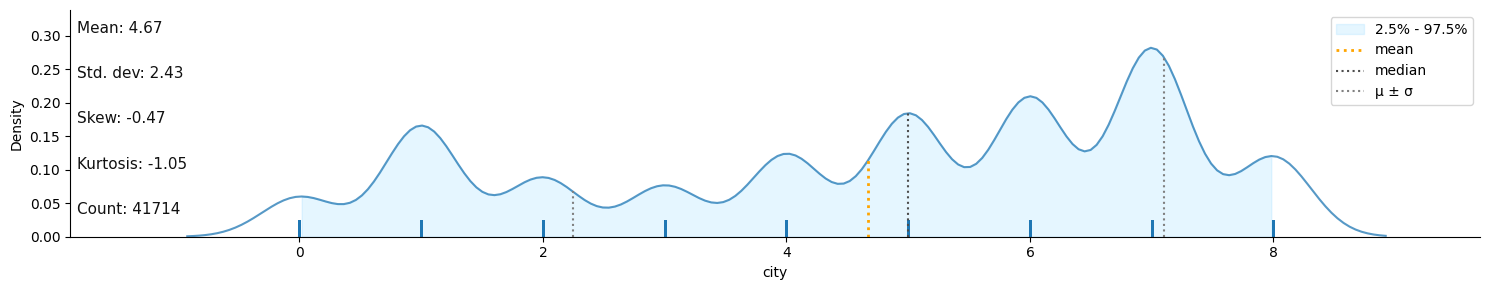

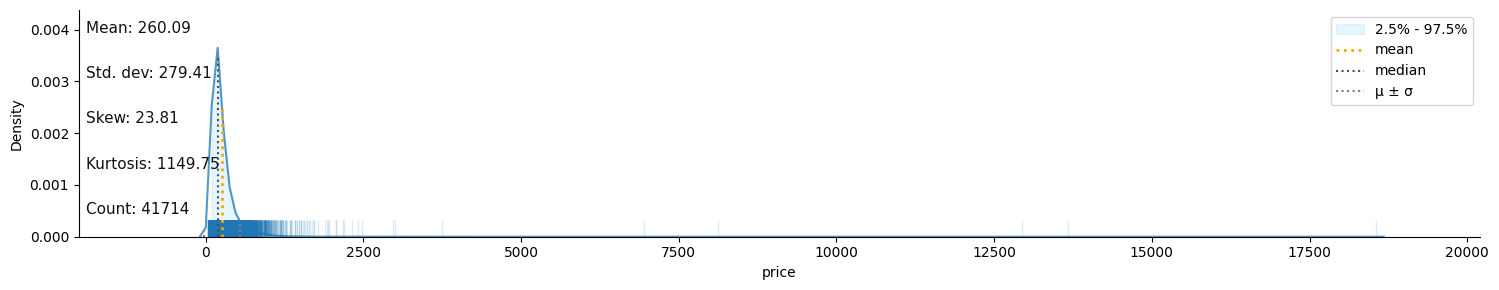

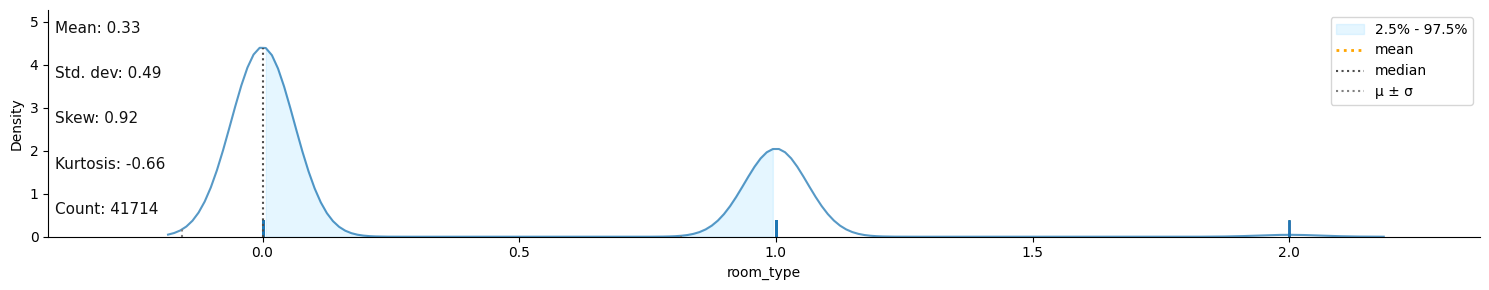

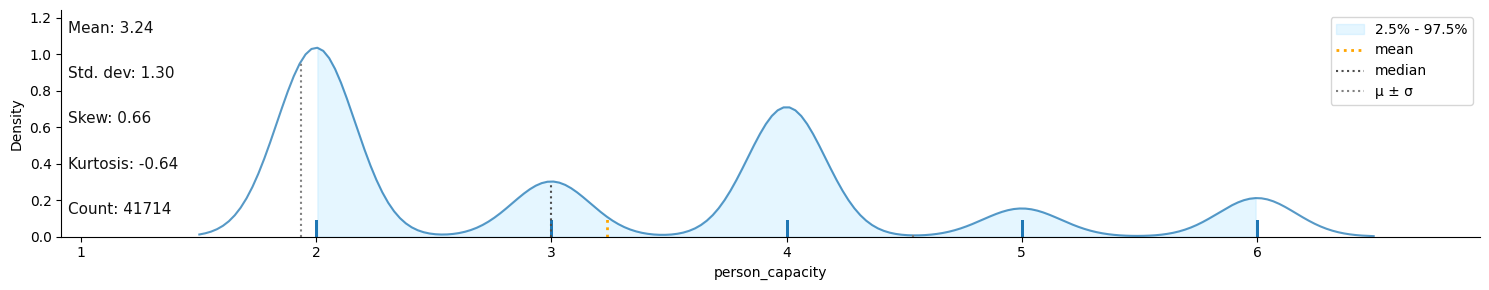

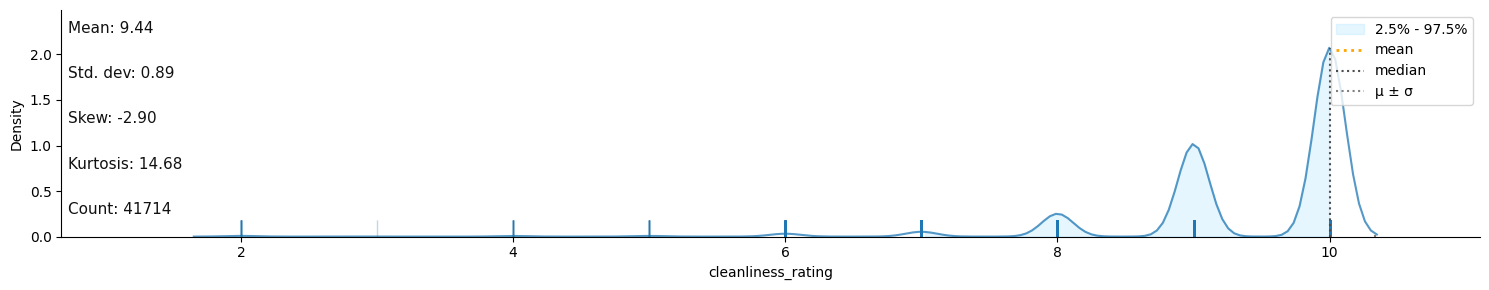

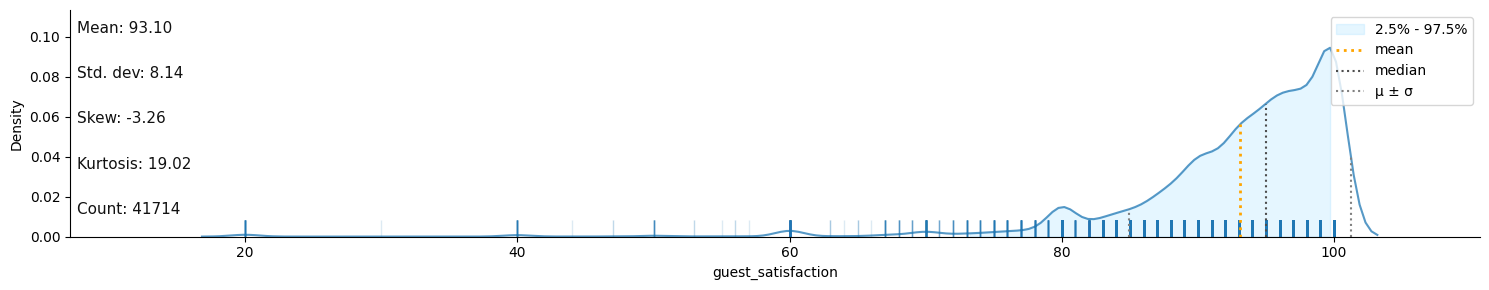

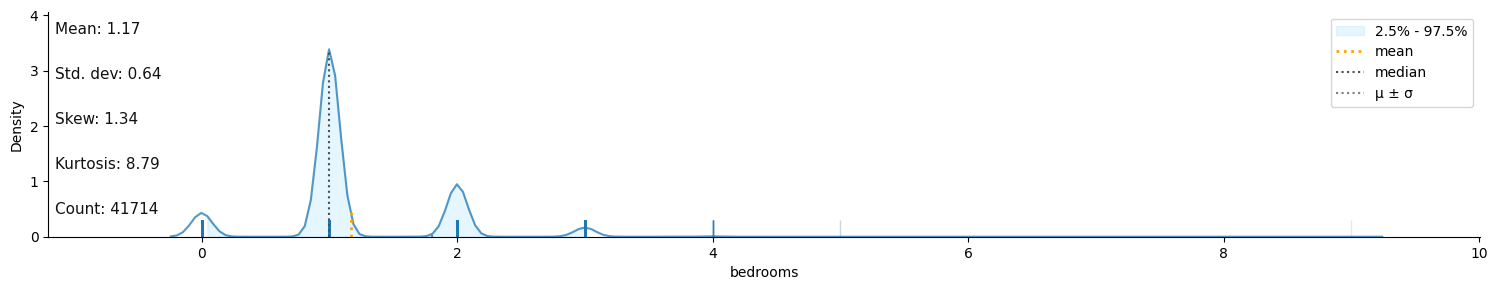

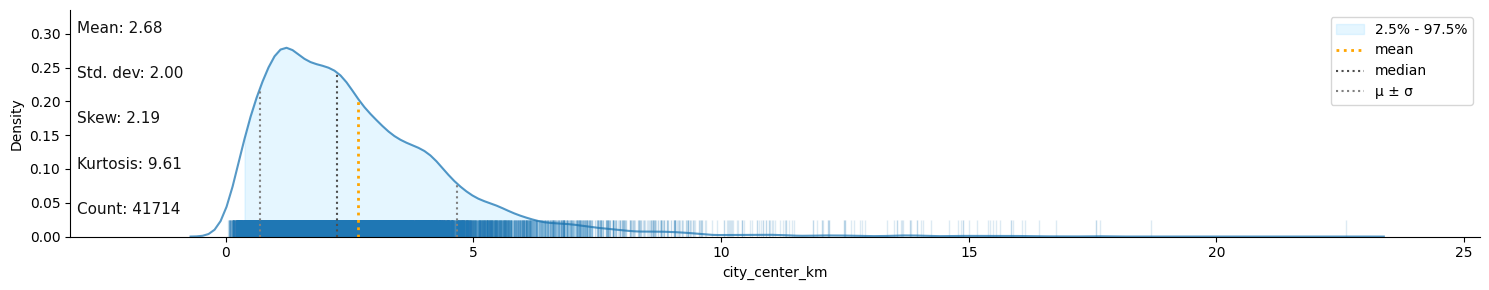

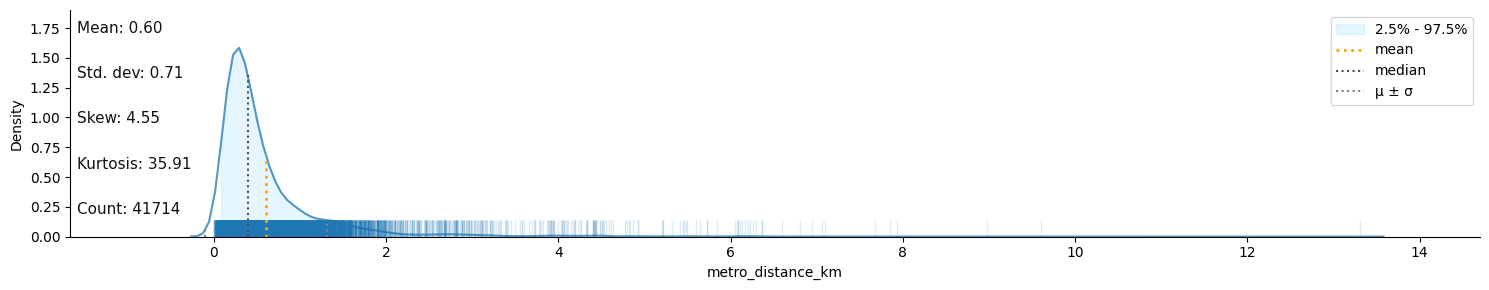

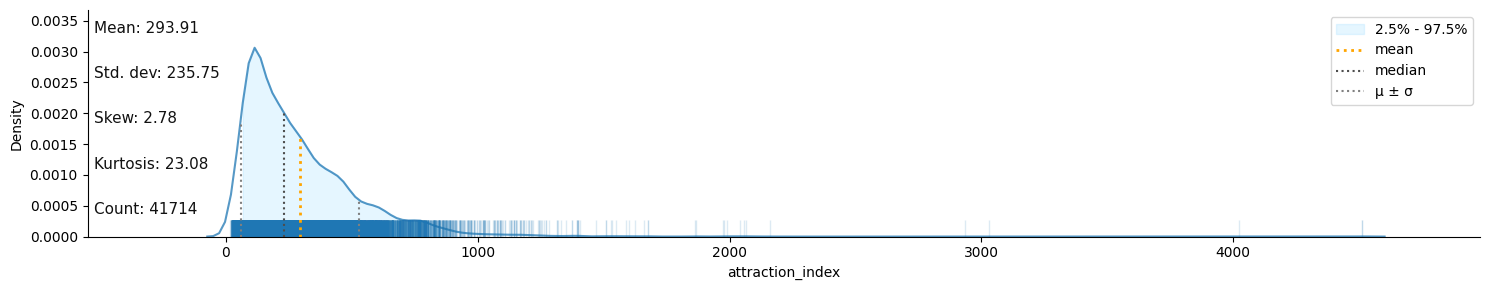

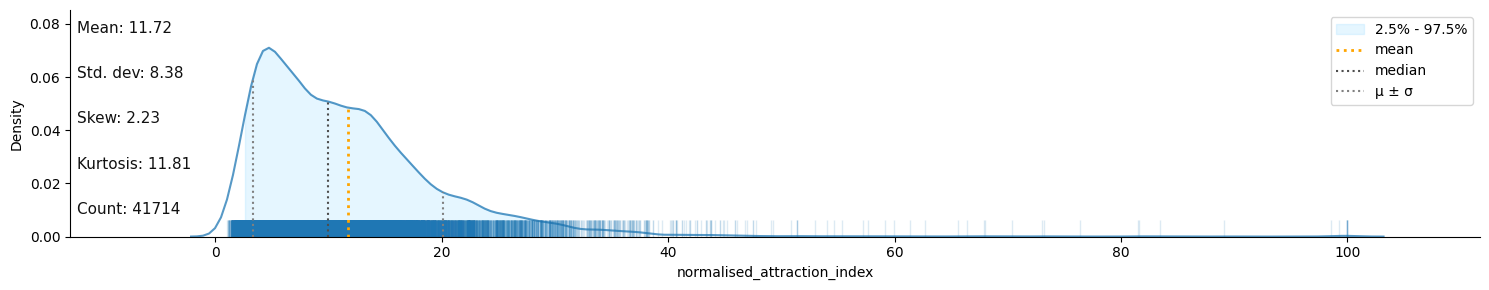

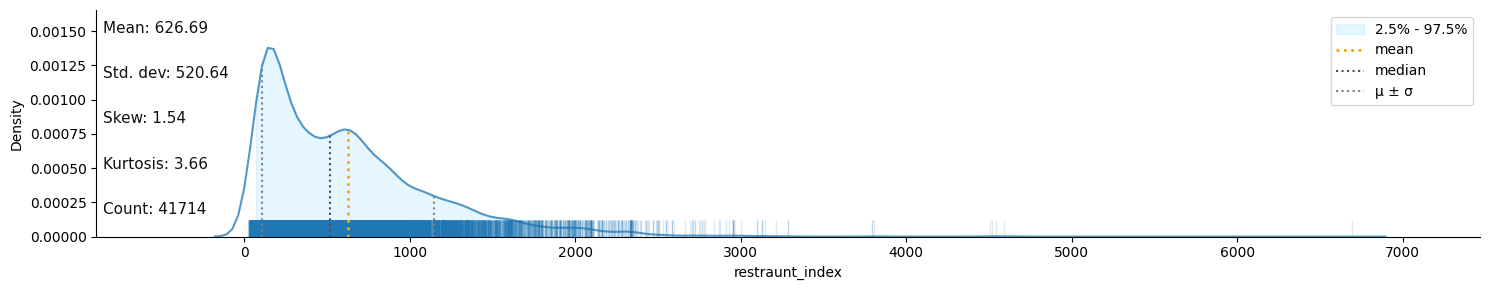

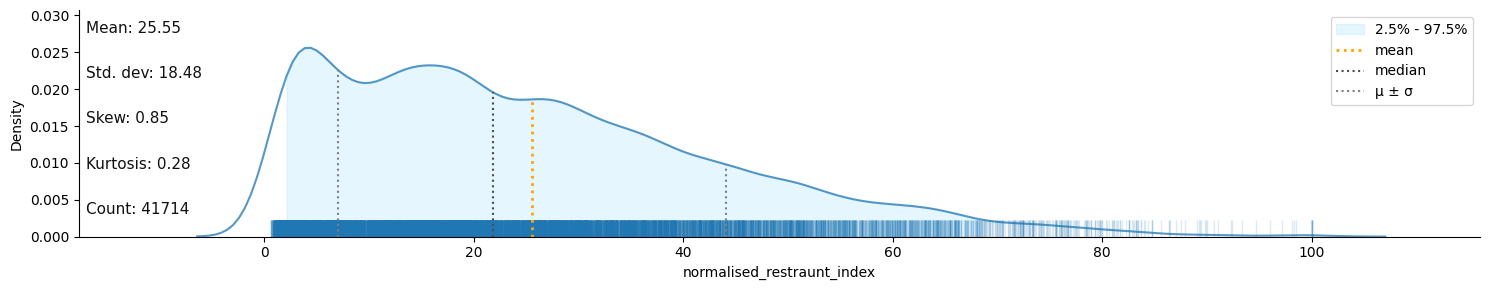

In [23]:
klib.dist_plot(airbnb)

In [24]:
import seaborn as sns

In [25]:
####! pip install evalml

In [26]:
###!pip install featuretools==0.6.1

In [27]:
####!pip install tornado==4.5.3

In [28]:
airbnb.shape

(41714, 19)

In [29]:
airbnb.columns

Index(['city', 'price', 'day', 'room_type', 'shared_room', 'private_room',
       'person_capacity', 'superhost', 'multiple_rooms', 'business',
       'cleanliness_rating', 'guest_satisfaction', 'bedrooms',
       'city_center_km', 'metro_distance_km', 'attraction_index',
       'normalised_attraction_index', 'restraunt_index',
       'normalised_restraunt_index'],
      dtype='object')

In [30]:
airbnb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41714 entries, 0 to 41713
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         41714 non-null  int8   
 1   price                        41714 non-null  float64
 2   day                          41714 non-null  int8   
 3   room_type                    41714 non-null  int8   
 4   shared_room                  41714 non-null  boolean
 5   private_room                 41714 non-null  boolean
 6   person_capacity              41714 non-null  float32
 7   superhost                    41714 non-null  boolean
 8   multiple_rooms               41714 non-null  int8   
 9   business                     41714 non-null  int8   
 10  cleanliness_rating           41714 non-null  float32
 11  guest_satisfaction           41714 non-null  float32
 12  bedrooms                     41714 non-null  int8   
 13  city_center_km  

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
X = airbnb.drop("price", axis=1)
y = airbnb["price"]

In [33]:
  # Splitting the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [34]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(29199, 18) (29199,)
(12515, 18) (12515,)


In [35]:
X_train.columns

Index(['city', 'day', 'room_type', 'shared_room', 'private_room',
       'person_capacity', 'superhost', 'multiple_rooms', 'business',
       'cleanliness_rating', 'guest_satisfaction', 'bedrooms',
       'city_center_km', 'metro_distance_km', 'attraction_index',
       'normalised_attraction_index', 'restraunt_index',
       'normalised_restraunt_index'],
      dtype='object')

In [36]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model=ExtraTreesRegressor()
model.fit(X_train,y_train)

ExtraTreesRegressor()

In [37]:
print(model.feature_importances_)

[0.14266591 0.01704251 0.01488622 0.00201611 0.01038575 0.06542564
 0.02069342 0.01631107 0.02900091 0.03729078 0.05064337 0.08324358
 0.08780286 0.05258921 0.07102238 0.1387705  0.07204569 0.08816406]


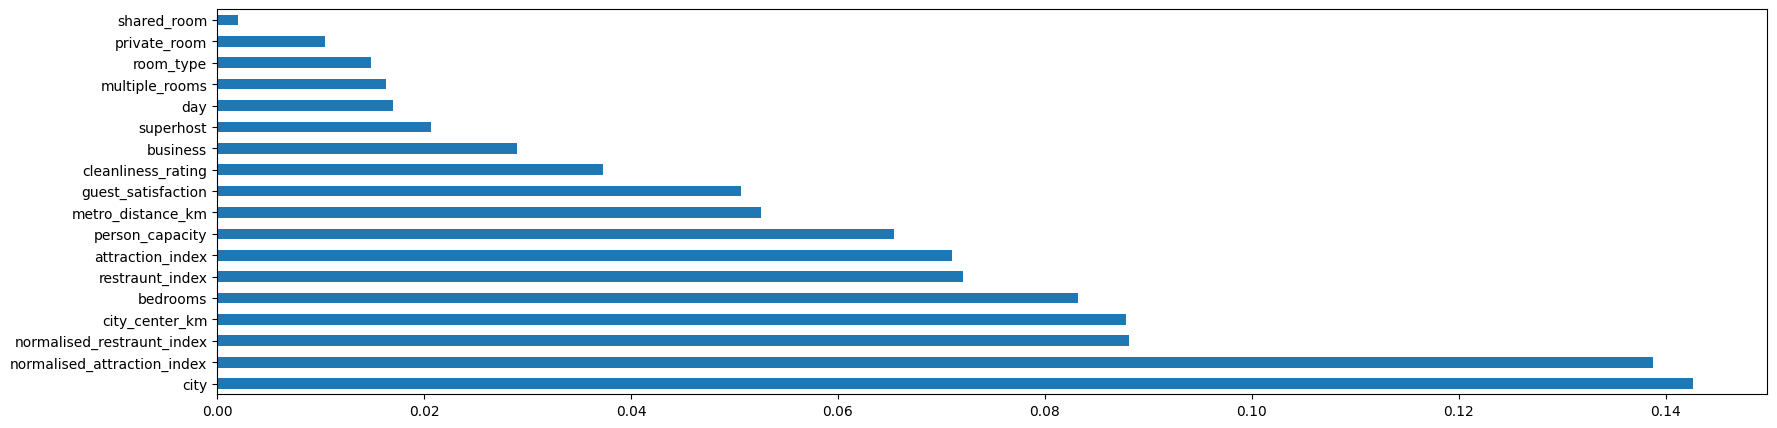

In [38]:
plt.figure(figsize=(20,5))
ranked_features=pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(20).plot(kind='barh')
plt.show()

<Axes: >

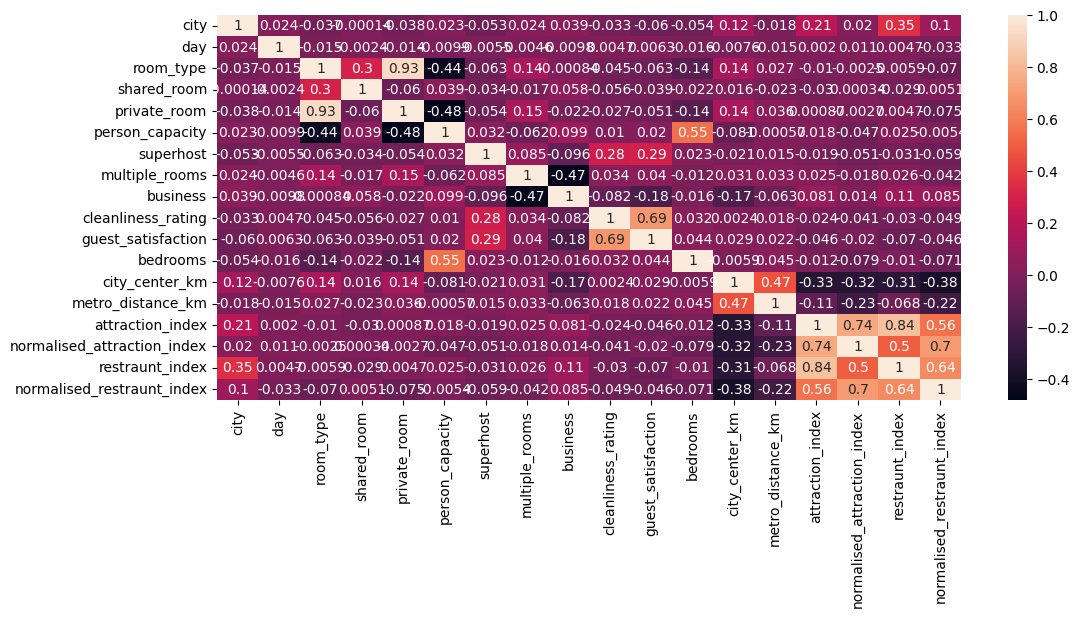

In [39]:
import seaborn as sns
corr=X_train.corr()
top_features=corr.index
plt.figure(figsize=(12,5))
sns.heatmap(X_train[top_features].corr(),annot=True)


In [40]:
threshold=0.8

In [41]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [42]:
correlation(X_train,threshold)

{'private_room', 'restraunt_index'}

In [43]:
X_train = X_train.drop(['private_room'], axis=1)
X_train = X_train.drop(['restraunt_index'], axis=1)

In [44]:
X_test = X_test.drop(['private_room'], axis=1)
X_test = X_test.drop(['restraunt_index'], axis=1)

In [45]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(29199, 16) (12515, 16)
(29199,) (12515,)


In [46]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [47]:
from sklearn.preprocessing import RobustScaler

In [48]:
from sklearn.preprocessing import RobustScaler
scaler=RobustScaler()
X_train=pd.DataFrame(scaler.fit_transform(X_train),columns=X_train.columns)
X_train.head(3)

,city,day,room_type,shared_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,normalised_restraunt_index
0,-1.0,0.0,0.0,0.0,-0.5,0.0,0.0,0.0,-1.0,0.50,-1.0,0.238118,1.396498,-0.623285,-0.776428,-0.589256
1,-1.0,1.0,0.0,0.0,0.5,1.0,1.0,0.0,0.0,0.25,0.0,-0.511844,-0.206046,-0.411095,-0.558847,-0.747002
2,0.0,0.0,0.0,0.0,1.5,0.0,1.0,0.0,-2.0,-0.75,1.0,-0.921164,-0.680492,0.813861,0.487637,1.300999


In [49]:
X_test=pd.DataFrame(scaler.fit_transform(X_test),columns=X_test.columns)
X_test.head(3)

,city,day,room_type,shared_room,person_capacity,superhost,multiple_rooms,business,cleanliness_rating,guest_satisfaction,bedrooms,city_center_km,metro_distance_km,attraction_index,normalised_attraction_index,normalised_restraunt_index
0,-0.2,-1.0,0.0,0.0,0.5,1.0,0.0,0.0,0.0,0.250,0.0,0.906040,4.180897,-0.559203,-0.509204,-0.497992
1,0.4,0.0,1.0,0.0,-0.5,0.0,0.0,1.0,0.0,-0.875,0.0,-0.690175,-0.420427,1.267208,0.272396,0.189180
2,-0.8,0.0,0.0,0.0,1.5,0.0,0.0,0.0,0.0,0.375,2.0,0.042206,0.001487,-0.485006,-0.612113,-0.762210


In [50]:
pipeline_lr=Pipeline([('scalar1',RobustScaler()),
                     ('pca1',PCA(n_components=2)),
                     ('lr_regressor',LinearRegression())])

In [51]:
pipeline_dt=Pipeline([('scalar2',RobustScaler()),
                     ('pca2',PCA(n_components=2)),
                     ('dt_regressorr',DecisionTreeRegressor())])

In [52]:
pipeline_randomforest=Pipeline([('scalar3',RobustScaler()),
                     ('pca3',PCA(n_components=2)),
                     ('rf_regressor',RandomForestRegressor())])

In [53]:
pipeline_gradient_boost=Pipeline([('scalar4',RobustScaler()),
                     ('pca4',PCA(n_components=2)),
                     ('gb_regressor',GradientBoostingRegressor())])

In [54]:
pipeline_XGboost=Pipeline([('scalar5',RobustScaler()),
                          ('pca5',PCA(n_components=2)),
                          ('xgb_regressor',XGBRegressor())])

In [55]:
## LEts make the list of pipelines
pipelines = [pipeline_dt, pipeline_randomforest,pipeline_gradient_boost,pipeline_XGboost]

In [56]:
best_accuracy=0.0
best_regressor=0
best_pipeline=""

In [57]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {1: 'Decision Tree', 2: 'RandomForest', 3: 'Gradient Boost', 4:'XGBoost Regressor'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train, y_train)

In [58]:
for i,model in enumerate(pipelines):
    if model.score(X_test,y_test)>best_accuracy:
        best_accuracy=model.score(X_test,y_test)
        best_pipeline=model
        best_regressor=i
print('Regressor with best accuracy:{}'.format(pipe_dict[best_regressor]))

Regressor with best accuracy:RandomForest


In [59]:
random_model = RandomForestRegressor(n_estimators=300, random_state = 42, n_jobs = -1)

In [60]:
###! pip install optuna

In [61]:
import optuna
import pandas as pd
from sklearn import linear_model
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

In [62]:
import sklearn.datasets
import sklearn.ensemble
import sklearn.model_selection

In [63]:
def objective(trial):

    # Invoke suggest methods of a Trial object to generate hyperparameters.
    regressor_name = trial.suggest_categorical('regressor', ['SVR', 'RandomForest'])
    if regressor_name == 'SVR':
        svr_c = trial.suggest_float('svr_c', 1e-10, 1e10, log=True)
        regressor_obj = sklearn.svm.SVR(C=svr_c)
    else:
        rf_max_depth = trial.suggest_int('rf_max_depth', 2, 32)
        regressor_obj = sklearn.ensemble.RandomForestRegressor(max_depth=rf_max_depth)

    X, y = sklearn.datasets.fetch_california_housing(return_X_y=True)
    X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=0)

    regressor_obj.fit(X_train, y_train)
    y_pred = regressor_obj.predict(X_test)

    error = sklearn.metrics.mean_squared_error(y_test, y_pred)

    return error  # An objective value linked with the Trial object.

In [64]:
study = optuna.create_study() 

[I 2023-05-16 08:02:16,367] A new study created in memory with name: no-name-be3af9f1-f195-441e-8eea-dc93e9f0d0ae


In [65]:
study.optimize(objective, n_trials=4)  

[I 2023-05-16 08:02:26,114] Trial 0 finished with value: 0.27222200382444983 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 17}. Best is trial 0 with value: 0.27222200382444983.
[I 2023-05-16 08:02:42,852] Trial 1 finished with value: 0.6310563818868483 and parameters: {'regressor': 'SVR', 'svr_c': 120.5644753993037}. Best is trial 0 with value: 0.27222200382444983.
[I 2023-05-16 08:02:49,395] Trial 2 finished with value: 0.30104178963697203 and parameters: {'regressor': 'RandomForest', 'rf_max_depth': 11}. Best is trial 0 with value: 0.27222200382444983.
[I 2023-05-16 08:03:05,501] Trial 3 finished with value: 0.5853991834239229 and parameters: {'regressor': 'SVR', 'svr_c': 216.08234272639595}. Best is trial 0 with value: 0.27222200382444983.


In [66]:
study.best_params

{'regressor': 'RandomForest', 'rf_max_depth': 17}

In [67]:
random_forest_rgr = RandomForestRegressor(n_estimators=523, max_depth=31)

In [68]:
random_forest_rgr.fit(X_train, y_train)

RandomForestRegressor(max_depth=31, n_estimators=523)

In [69]:
y_pred = random_forest_rgr.predict(X_test)

In [71]:
#from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,y_pred))
#print(accuracy_score(y_test,y_pred))

143.29857067403893


In [72]:
y_pred = pd.DataFrame(y_pred)

In [73]:
y_pred.rename(columns = {0:"Predict"}, inplace=True)

In [74]:
y_pred.value_counts()

Predict    
195.716243     3
343.994057     3
169.140648     3
176.822713     2
290.846867     2
              ..
194.607450     1
194.613951     1
194.695697     1
194.712340     1
2354.163050    1
Length: 12382, dtype: int64